In [2]:
import os
import glob

import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

## Data Loading

In [3]:
df_occurence = pd.read_csv("../dataset/combined/occurences.csv", parse_dates=["ts"])
df_occurence = gpd.GeoDataFrame(df_occurence, geometry=gpd.points_from_xy(df_occurence["longitude"], df_occurence["latitude"]), crs="EPSG:4326")
# df_occurence["ts_monthly"] = df_occurence["ts"].dt.strftime('%Y-%m')
# df_occurence["ts_annually"] = df_occurence["ts"].dt.year
df_occurence.head()

,occurrenceID,ts,latitude,longitude,species,geometry
0,409742,2023-11-30,-25.363597,46.837436,Megaptera novaeangliae,POINT (46.83744 -25.3636)
1,403039,2023-11-21,-21.220602,55.205602,Megaptera novaeangliae,POINT (55.2056 -21.2206)
2,405925,2023-11-19,-33.476485,115.064949,Megaptera novaeangliae,POINT (115.06495 -33.47648)
3,403038,2023-11-14,-21.235409,55.226194,Megaptera novaeangliae,POINT (55.22619 -21.23541)
4,403037,2023-11-13,-21.269454,55.201475,Megaptera novaeangliae,POINT (55.20148 -21.26945)


<Axes: >

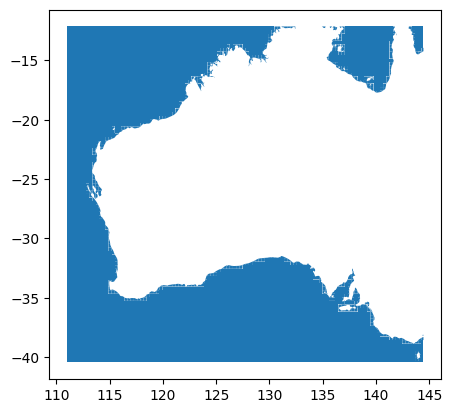

In [4]:
df_geom = gpd.read_file("../dataset/australia/shp/grid-sea-australia-zoned.shp")
df_geom.plot()

In [4]:
ds = xr.open_dataset("../dataset/australia/cmems/cmems_mod_glo_phy_anfc_0.083deg_P1D-m_zos-pbo-tob-sob_112.00E-143.00E_39.00S-13.00N_2021-09-01-2023-11-30.nc")
ds

<xarray.Dataset> Size: 3GB
Dimensions:    (time: 821, latitude: 625, longitude: 373)
Coordinates:
  * latitude   (latitude) float32 2kB -39.0 -38.92 -38.83 ... 12.83 12.92 13.0
  * longitude  (longitude) float32 1kB 112.0 112.1 112.2 ... 142.8 142.9 143.0
  * time       (time) datetime64[ns] 7kB 2021-09-01 2021-09-02 ... 2023-11-30
Data variables:
    zos        (time, latitude, longitude) float32 766MB ...
    pbo        (time, latitude, longitude) float32 766MB ...
    tob        (time, latitude, longitude) float32 766MB ...
    sob        (time, latitude, longitude) float32 766MB ...
Attributes:
    Conventions:               CF-1.8
    area:                      Global
    contact:                   https://marine.copernicus.eu/contact
    credit:                    E.U. Copernicus Marine Service Information (CM...
    institution:               Mercator Ocean International
    licence:                   http://marine.copernicus.eu/services-portfolio...
    producer:                  CMEMS - Global Monitoring and Forecasting Centre
    references:                http://marine.copernicus.eu
    source:                    MOI GLO12
    title:                     daily mean fields from Global Ocean Physics An...
    copernicusmarine_version:  1.1.1

## Visualization

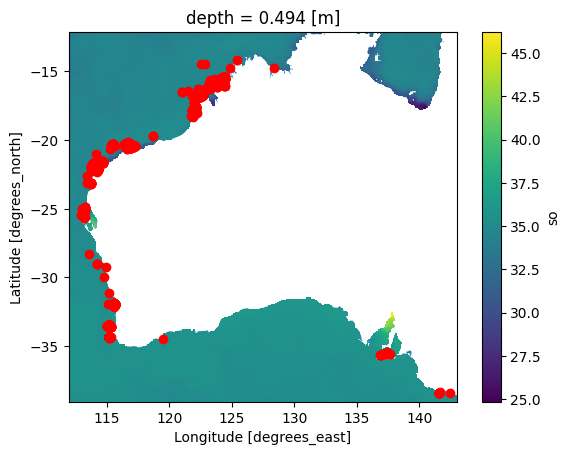

In [65]:
# africa 
# df_vis = df_occurence[df_occurence["longitude"] < 60]
# australia
# longitude=slice(110.97449, 144.46291), latitude=slice(-40.436792, -12.151667)
df_vis = df_occurence[df_occurence["longitude"] > 60]

ds_vis = ds["so"].sel(time=slice("2023-05-01", "2023-05-31"), longitude=slice(110.97449, 144.46291), latitude=slice(-40.436792, -12.151667)).mean(dim=["time"])

# plot
fig, ax = plt.subplots()

df_geom.plot(ax=ax)
ds_vis.plot(ax=ax)
df_vis.plot(ax=ax, color="red")

plt.show()

In [7]:
files = glob.glob("./anim/*.png")
sorted_files = []

files_split = [s.split("/")[-1].split("-") for s in files]
parsed_files = [(int(s[0]), int(s[1]), int(s[2][:2])) for s in files_split]
sorted_files = list(sorted(parsed_files, key=lambda x: (x[1], x[2])))

with open("list.txt", "w") as f:
    for entry in sorted_files:
        f.write(f"file 'anim/{entry[0]}-{entry[1]}-{entry[2]:02}.png'\n")
        f.write("duration 0.3\n")